## Dimensionality Reduction

Many tasks that data scientists handle involve humongous datasets with many variables. At the end of the day we as data scientists wish to take all these variables that we collected (the given features) and gather important and valuable information. <br>
But how can we do it if we already have too much features to start with. In order to solve this problem we use **dimensionality reduction** to reduce the dimension of our data,meaning that we wish to use less features. <br>
There are two common ways of dimensionality reduction: <br>
1.Feature Eliminaition. <br>
2.Feature Extraction.<br>
Feature elimination is much easier to do than feature extraction but it's main problem is that we may **lose data** while doing so. Feature extraction is a lot harder to do but it's main cause is to keep important variations in our data that may lead to valuable discoveries while slimming the data's dimensionality. <br>

#### PCA
PCA stands for Principal Component Analysis is a way to reduce the dimensionality of our data using feature extraction. Meaning given n features that describe our data we can use PCA to create $n$ **new features** that are completely **independent** that describes our data, we can then reduce the dimensionality by choosing the $k$ important features of our n new features (of course $k < n$). <br>

**Note**: Even though PCA reduces the dimensionality of our data by keeping all it's features completely independent an important thing to note is that the features that we get as a result of this algorithm are **less interpretable**.

##### How PCA works?
Because the algorithm involves a lot of technical math I will first try to explain the idea behind it. The first thing the algorithm does is create a matrix that will describe the relations between all the features in our data, meaning how each feature effects the other features. We will then we will use this matrix to compute two metrics: the **directions** in which our data flows and the **magnitude** of the datapoints in each direction.<br>
For example in a 2D space we can have the following directions (these graphs are from the [setosa.io blog](http://setosa.io/ev/principal-component-analysis/) check it out)

![title](setosa1.png)


We can see two directions in our data : the red direction and the green direction. Now if we plot our data relatively to both of these directions we will get the following:

![title](setosa2.png)

We can clearly see from the plot above that the red direction is way more powerful and important for our data. So if we will dump the green direction we will get 1D data using the red direction.

In a more general case, for an N-dimensional data we can determine which directions are more important than others and reduce it's dimensionality!

#### Math Math Math



So how can we compute a matrix that describes the relations between each of our features? <br>
Probability theory comes to the rescue!<br>
We can use the [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix), in an n-dimensional data with features $x_1,x_2 ... x_n$ the covariance matrix $Cov$ will be a $(n,n)$ dimensional matrix where: $$Cov[i,j] = Covariance\ of\ x_i\ and\ x_j$$ <br>
The [**covariance**](https://en.wikipedia.org/wiki/Covariance) is simply a measure that helps us describe relationships between two variables. Meaning if great values of the first variables correspond with great values of the other the covariance will be positive,if it's in the other direction (greater values in the first yield lesser values in the second) the covariance will be negative.<br>
Formal definition of the covariance:
$$ cov(X,Y) = E[(X - E[X])(Y - E[Y])]$$
The covariance is simply the expected value(mean) of the product of the deviations of X and Y from their expected values. 

#### The Algorithm

Given a matrix $X \in \mathcal{R}^{n\times p}$ that will hold all of our data, meaning there are $n$ training examples and $p$ features. We will go through the following steps:<br>

1.**Mean Normalization**: Take each column of $X$ that represents some feature in our data and substract the value of the mean of this feature from this column. This way we will get that each feature in our data will have a mean of 0 (wondering why this is necessary [read here](https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa))<br>

2.**Standardization**: We need to decide whether the variance effects the importance of features,if it is than we will leave the data as it is, otherwise we will divide each feature column by it's standard deviation.We will save the new values in our matrix $X$.<br>

3.**Compute Covariance Matrix**: We can compute the covariance matrix of X using the computation below: $$Cov[X] = {X}^\intercal * X $$<br>


4.**Compute eigenvalues and eigenvectors**: Take the covaraince matrix that we already computed and compute it's [eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors). After computing the eigenvectors create a matrix $P$ that will hold all the eigenvectors in it's columns.<br>

5.**Sort by importance**: Take the eigenvalues that we computed $\lambda_1,\lambda_2,...,\lambda_p$ and sort them from largest to smallest,order the eigenvectors that we saved in $P$ in the same order. Notice that all the eigenvectors saved in the columns of $P$ are independent of one another,because each eigenvector is [orthogonal](https://en.wikipedia.org/wiki/Orthogonality) to other eigenvectors (basically means they are perpendicular).<br>

6.**Multiply X by P**: Take the normalized and standardized matrix $X$(from step 2) and multiply it by our ordered eigenvectors matrix $P$ and save it in a new matrix $Z$:
$$Z = XP$$
The $Z$ matrix holds our data where each cell holds a **linear combination** of our original features where in each cell the **weights are a different eigenvector** where they are ordered by importance.<br>

7.**Decision Time**: We need to decide how many features will we keep and how many will we drop. A common way of doing this is computing the [proportion of variance explained](https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained) by each feature and picking the k most important ones (if we want to reduce our n-dimensional data to be k-dimensional).

##### Code
Note: Most of the math heavy parts of the algorithm are already implemented so this will be quite short.

In [1]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
from sklearn import datasets

In [17]:
#Random training data.
X = np.random.randint(100,size=(150,3))
iris = datasets.load_iris()['data']
X = iris
print(X.shape)

def pca(data,num_components = 2):
    '''
    Perform the pca on a given dataset in order to reduce it's dimensionality
    to use num_components.
    '''
    
    #Mean normalization
    normalized = (data - np.mean(data,axis = 0)) / np.std(data,axis = 0)
    
    #Compute covariance matrix.
    cov = normalized.T.dot(normalized)
    
    #Compute eigenvectors and eigenvalues of this matrix.
    values,vectors = eig(cov)
    
    #Sort the eigenvectors and values in matching order from largest to smallest value.
    sorting_idxs = np.argsort(values)[::-1]
    print("Eigenvalues")
    print(values)
    
    eigenvec_matrix = vectors[:,sorting_idxs]
    
    return data.dot(eigenvec_matrix[:,:num_components]),eigenvec_matrix[:,:num_components]

output_data,vectors = pca(X,num_components=3)
vectors.shape

(150, 4)
Eigenvalues
[436.62271256 138.18313961  22.10299175   3.09115609]


(4, 3)

### Number of Principle Components

After we have already implemented the algorithm and explained the idea behind it another important question should pop to your head: what is considered a good **sub-space**?

Given n-dimensional dataset how could we know to which dimension $k$ should we reduce it's dimensionality (meaning using k principle components). The answer in this question lies in the explanation of step 7 in our algorithm. In the last step of the algorithm we take the matching eigenvectors of the k-largest eigenvalues, because we already explained that each eigenvalue stands for the proportion of variance explained by the matching principle component. But what if all eigenvalues will have an evenly matched value (meaning there aren't very small eigenvalues relative to the others), this means that all principle components have the same proportion of variance explained which means we are already in a good sub-space and no reduction in dimensionality is needed.

### Glass dataset

First, let's inspect a higher dimensional data to see the way our algorithm interprets the data and how the data variates between all of our current features.We will use a dataset that will contain 9 features that describe 6 types of glasses.

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv("glass.csv")
df.drop(["Index","Class"],axis=1,inplace=True)
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [23]:
X = df.as_matrix()

In [24]:
output,vectors = pca(X,num_components=6)

Eigenvalues
[5.37389037e+02 4.38715448e+02 3.00636615e+02 2.47782564e+02
 1.95596481e+02 1.12913931e+02 7.89571069e+01 1.36645308e+01
 3.44287014e-01]


We can see that for our 9-dimensional data there are 6 highly variative eigenvectors (because we have 6 eigenvalues in the 1e^2 range). This means that a good subspace to reduce to is a 6 dimensional subspace,for any subspace smaller than that we may lose lots of variance in our data.
Because the subspace is hard to visualize (basically any subspace which is over 3D) we will go over another example where we could actually see the eigenvalues and how our data plots using the computed principal components.

### Visualizations

In order to visualize our data I will turn to the popular [iris dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) and use **only 3** of it's features in order to have 3 dimensional eigenvectors that we could plot and inspect in 3D space.

In [87]:
from sklearn import datasets

iris = datasets.load_iris()['data'][:,:3]

In [88]:
#Use num_components=3 in order to get all available eigenvectors.
reduced_data,eigenvectors = pca(iris,num_components=3)

#Normalize our data (remember that the eigenvectors are computed over a normalized feature scaled data)
iris = (iris - np.mean(iris,axis = 0)) / np.std(iris,axis = 0)

Eigenvalues
[302.07394608  10.7014459  137.22460802]


In [89]:
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):
    p = mpatches.FancyArrow(0, 0.5*height, width, 0, length_includes_head=True, head_width=0.75*height )
    return p

<IPython.core.display.Javascript object>


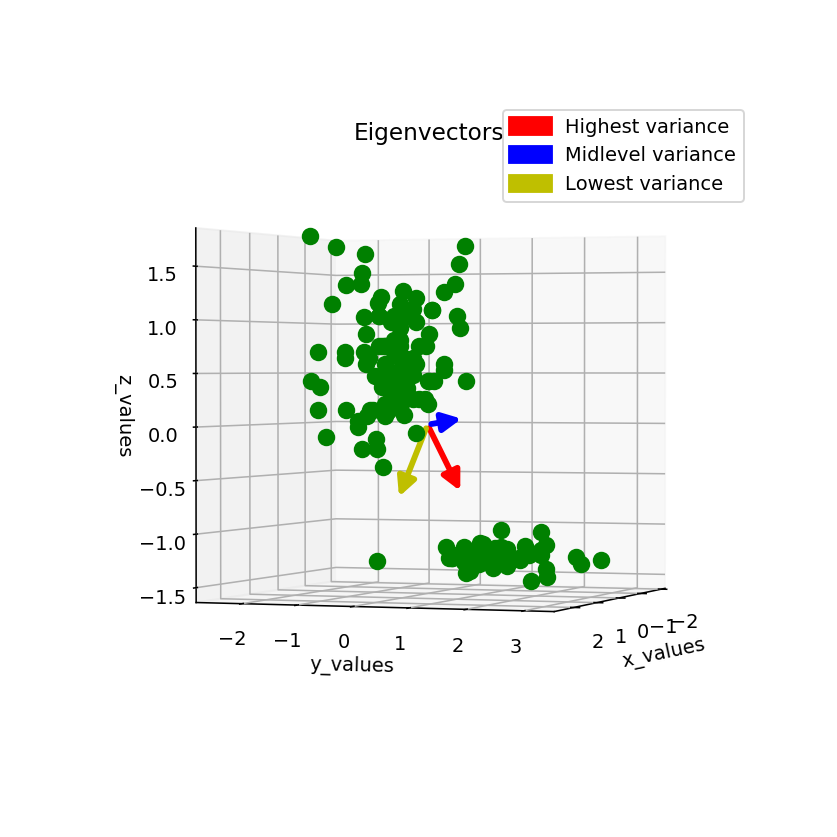

Text(0.5,0.92,'Eigenvectors')

In [90]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self,xs,ys,zs,*args,**kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
mean_x = np.mean(iris[:,0])
mean_y = np.mean(iris[:,1])
mean_z = np.mean(iris[:,2])


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')

ax.plot(iris[:,0],iris[:,1],iris[:,2],'o',markersize=8,color='green')

colors = ["r","b","y"]
arrows = []

for index,vec in enumerate(eigenvectors.T):
    arrow = Arrow3D([mean_x,vec[0]],[mean_y,vec[1]],[mean_z,vec[2]],
                    mutation_scale=20,lw=3,arrowstyle="-|>", color=colors[index])
    ax.add_artist(arrow)
    arrows.append(arrow)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.legend(arrows, ['Highest variance','Midlevel variance','Lowest variance']
           , handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow),
                                             })

plt.title('Eigenvectors')

        

You may have noticed that on each usage of the pca function we print all the eigenvalues of the covariance matrix. As we can see while running PCA on the iris dataset we can see that we have two eigenvalues that are significantly higher than the last one. This means that the eigenvectors corresponding to those eigenvalues hold more variance of the data than the last eigenvector. Let's check it out in action by reducing our data from 3D space to 2D space.

Eigenvalues
[302.07394608  10.7014459  137.22460802]


<IPython.core.display.Javascript object>


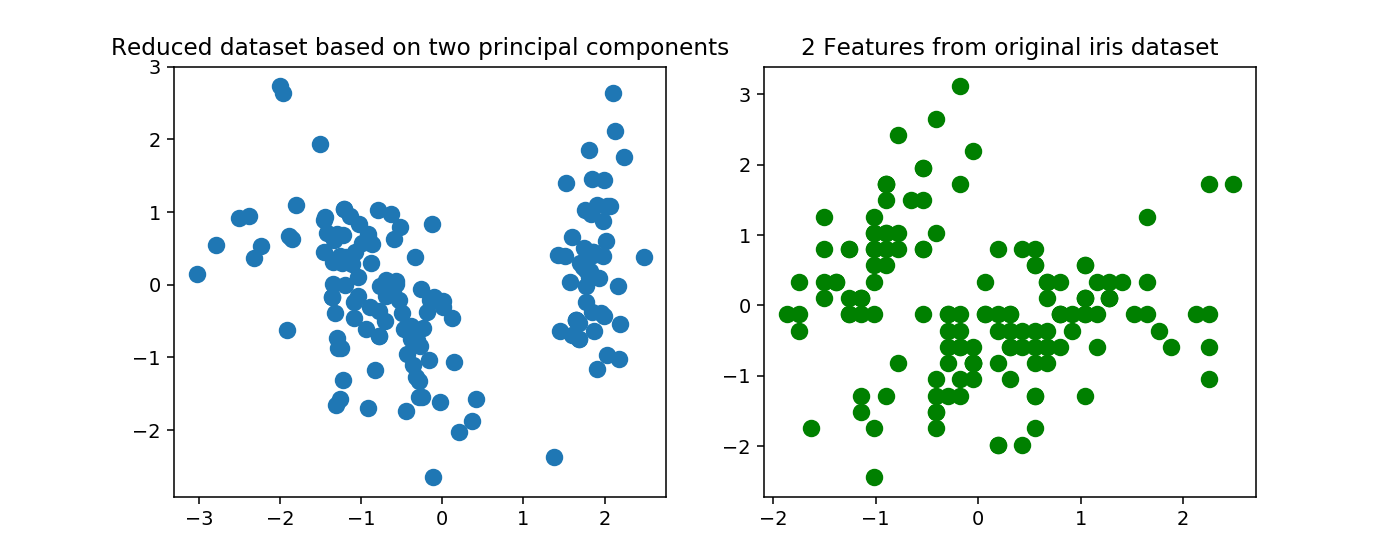

Text(0.5,1,'2 Features from original iris dataset')

In [106]:
#Use PCA in order to reduce the dataset to 2D space.
reduced_data,eigenvectors = pca(iris,num_components=2)

#Plot original dataset and reduced dataset in 2D space next to each other.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot(reduced_data[:,0],reduced_data[:,1],'o',markersize=8)
ax1.set_title("Reduced dataset based on two principal components")
ax2.plot(iris[:,0],iris[:,1],'o',color='g',markersize=8)
ax2.set_title("2 Features from original iris dataset")

We can clearly see from the plots above that the reduced dataset that is based on two principal components as axis is much clearer,we can see the clusters in the data much better which strengthens argument that 2D is a good subspace to reduce this dataset to.